In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_df = pd.read_csv('fmnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [3]:
#Если в данных есть NaN-значения, это может сильно ухудшать качество модели
print(train_df.isna().sum().sum())

424


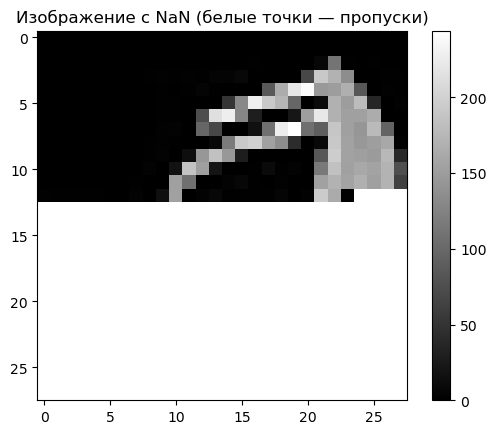

In [4]:
pixels = train_df[train_df.isna().any(axis=1)].iloc[0].drop(['label', 'Id']).values.reshape(28, 28)

plt.imshow(pixels, cmap='gray')
plt.title('Изображение с NaN (белые точки — пропуски)')
plt.colorbar()
plt.show()

In [5]:
#Характер пропусков случайный, применим линейную интерполяцию по пикселям
train_df = train_df.interpolate(axis=1)

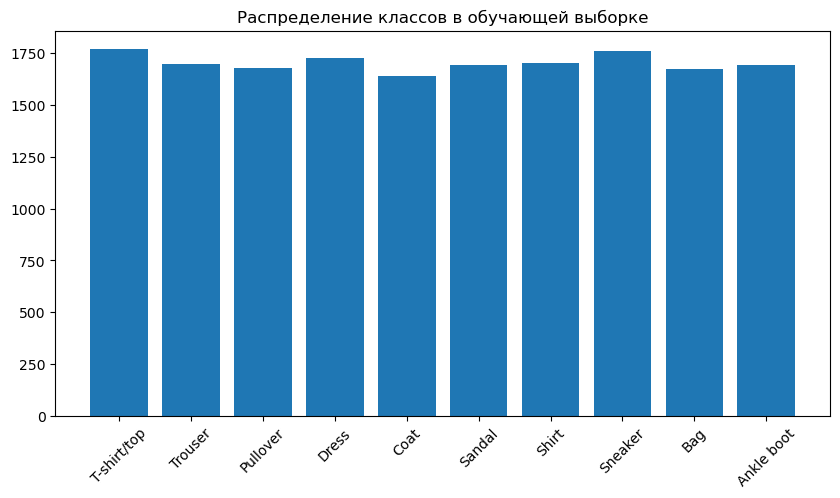

In [ ]:
#Явного дисбаланса классов нет
class_counts = train_df['label'].value_counts().sort_index()
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(10, 5))
plt.bar(classes, class_counts)
plt.xticks(rotation=45)
plt.title('Распределение классов в обучающей выборке')
plt.show()

In [7]:
X = train_df.drop(columns=['label', 'Id']).values / 255.0  # Нормализация
y = train_df['label'].values
X = X.reshape(-1, 28, 28, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/100
426/426 [==============================] - 5s 4ms/step - loss: 0.6839 - accuracy: 0.7667 - val_loss: 0.8192 - val_accuracy: 0.7080
Epoch 2/100
426/426 [==============================] - 1s 3ms/step - loss: 0.4367 - accuracy: 0.8428 - val_loss: 0.4066 - val_accuracy: 0.8495
Epoch 3/100
426/426 [==============================] - 1s 3ms/step - loss: 0.3685 - accuracy: 0.8649 - val_loss: 0.5161 - val_accuracy: 0.8281
Epoch 4/100
426/426 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8859 - val_loss: 0.3593 - val_accuracy: 0.8680
Epoch 5/100
426/426 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.8940 - val_loss: 0.3756 - val_accuracy: 0.8715
Epoch 6/100
426/426 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.9039 - val_loss: 0.3543 - val_accuracy: 0.8656
Epoch 7/100
426/426 [==============================] - 1s 3ms/step - loss: 0.2313 - accuracy: 0.9120 - val_loss: 0.3854 - val_accuracy: 0.8709

In [9]:
test_df = pd.read_csv('fmnist_test.csv')
X_test = test_df.drop(columns=['Id']).values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
#Проверим, есть ли в тестовом наборе NaN-значения
print(test_df.isna().sum().sum())

0


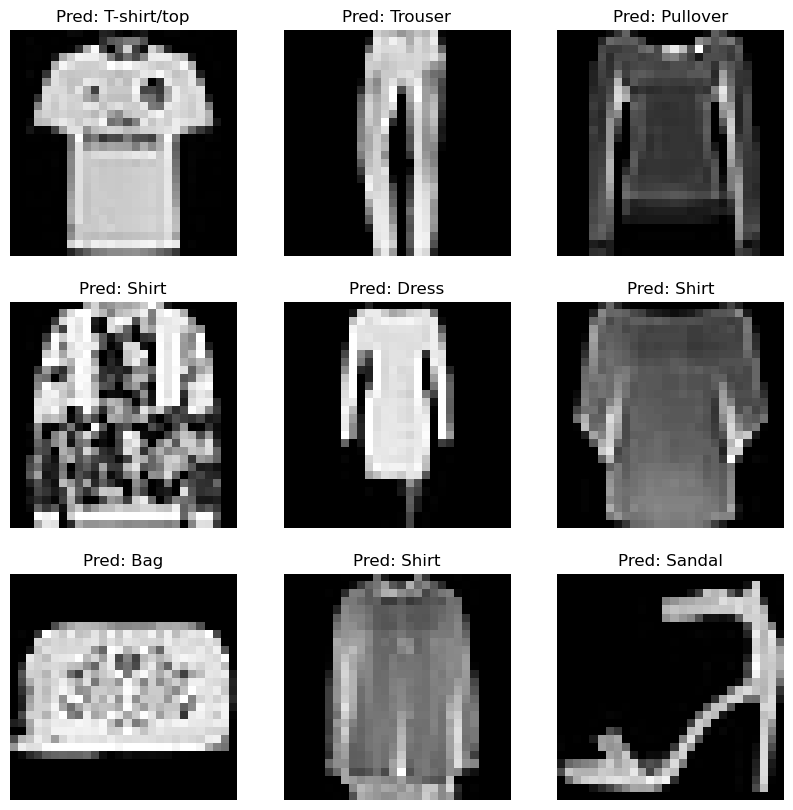

In [11]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {classes[y_pred_classes[i]]}')
    plt.axis('off')
plt.show()

In [ ]:
submission = pd.DataFrame({'Id': test_df['Id'], 'label': y_pred_classes})
submission.to_csv('submission.csv', index=False)

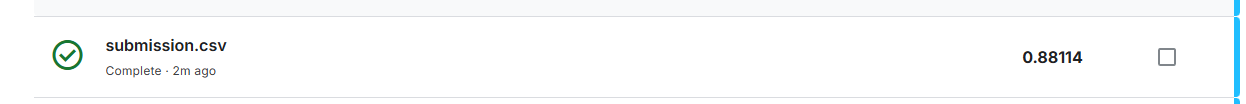

In [ ]:
#Переобучим модель на всем датасете
X_full = np.concatenate([X_train, X_val])
y_full = np.concatenate([y_train, y_val])

optimal_epochs = len(history.history['val_loss'])
model.fit(X_full, y_full, epochs=optimal_epochs)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/11
533/533 [==============================] - 2s 4ms/step - loss: 0.3023 - accuracy: 0.8931
Epoch 2/11
533/533 [==============================] - 2s 3ms/step - loss: 0.2637 - accuracy: 0.9057
Epoch 3/11
533/533 [==============================] - 2s 4ms/step - loss: 0.2206 - accuracy: 0.9174
Epoch 4/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1930 - accuracy: 0.9275
Epoch 5/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1882 - accuracy: 0.9309
Epoch 6/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1663 - accuracy: 0.9400
Epoch 7/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1564 - accuracy: 0.9418
Epoch 8/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1413 - accuracy: 0.9475
Epoch 9/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1328 - accuracy: 0.9497
Epoch 10/11
533/533 [==============================] - 2s 3ms/step - loss: 0.1325 - accuracy: 0.9530

In [14]:
submission = pd.DataFrame({'Id': test_df['Id'], 'label': y_pred_classes})
submission.to_csv('submission.csv', index=False)

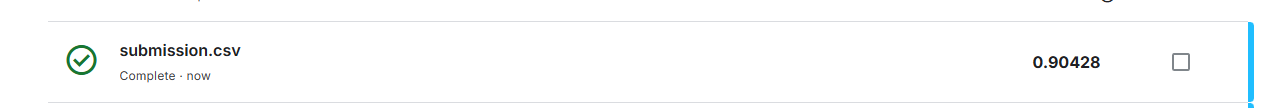